In [ ]:
import pandas as pd
import numpy as np
import re
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib import style

import nltk
nltk.download('stopwords')
nltk.download('punkt')
style.use('ggplot')

from nltk.tokenize import word_tokenize
from nltk.stem import PorterStemmer
from nltk.corpus import stopwords
stop_words = set(stopwords.words('english'))

from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, ConfusionMatrixDisplay

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


In [ ]:
df=pd.read_csv("Dataset-SA.csv")   # read the csv file

In [ ]:
df.head(5) # Fetch First 5 data

,product_name,product_price,Rate,Review,Summary,Sentiment
0,Candes 12 L Room/Personal Air Cooler??????(Whi...,3999,5,super!,great cooler excellent air flow and for this p...,positive
1,Candes 12 L Room/Personal Air Cooler??????(Whi...,3999,5,awesome,best budget 2 fit cooler nice cooling,positive
2,Candes 12 L Room/Personal Air Cooler??????(Whi...,3999,3,fair,the quality is good but the power of air is de...,positive
3,Candes 12 L Room/Personal Air Cooler??????(Whi...,3999,1,useless product,very bad product its a only a fan,negative
4,Candes 12 L Room/Personal Air Cooler??????(Whi...,3999,3,fair,ok ok product,neutral


In [ ]:
df.info() # get the information about the dataset

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205052 entries, 0 to 205051
Data columns (total 6 columns):
 #   Column         Non-Null Count   Dtype 
---  ------         --------------   ----- 
 0   product_name   205052 non-null  object
 1   product_price  205052 non-null  object
 2   Rate           205052 non-null  object
 3   Review         180388 non-null  object
 4   Summary        205041 non-null  object
 5   Sentiment      205052 non-null  object
dtypes: object(6)
memory usage: 9.4+ MB


In [ ]:
df.isnull().sum() # Check there is any null value

product_name         0
product_price        0
Rate                 0
Review           24664
Summary             11
Sentiment            0
dtype: int64

In [ ]:
df.drop(['Review'],axis=1,inplace=True) # Drop the Review column for contain large Null value

In [ ]:
df1=df.dropna(axis=0) # to remove the null values from row

In [ ]:
df1[:1]  # fetch singel row

,product_name,product_price,Rate,Summary,Sentiment
0,Candes 12 L Room/Personal Air Cooler??????(Whi...,3999,5,great cooler excellent air flow and for this p...,positive


In [ ]:
df1.info()  #after remove null values Check there is any null value

<class 'pandas.core.frame.DataFrame'>
Index: 205041 entries, 0 to 205051
Data columns (total 5 columns):
 #   Column         Non-Null Count   Dtype 
---  ------         --------------   ----- 
 0   product_name   205041 non-null  object
 1   product_price  205041 non-null  object
 2   Rate           205041 non-null  object
 3   Summary        205041 non-null  object
 4   Sentiment      205041 non-null  object
dtypes: object(5)
memory usage: 9.4+ MB


In [ ]:
text_df=df.drop(['product_name','product_price','Rate'],axis=1)  # Remove more 3 column

In [ ]:
text_df   # Fetch the dataset

,Summary,Sentiment
0,great cooler excellent air flow and for this p...,positive
1,best budget 2 fit cooler nice cooling,positive
2,the quality is good but the power of air is de...,positive
3,very bad product its a only a fan,negative
4,ok ok product,neutral
...,...,...
205047,good product,positive
205048,nice,positive
205049,very nice and fast delivery,positive
205050,awesome product,positive


In [ ]:
mapping = {
    'positive': 1,
    'negative': -1,
    'neutral': 0
}

text_df['sentiment']=text_df['Sentiment'].map(mapping)   # Use map function to set value for +ve,-ve and neutral

In [ ]:
text_df.head(2)   # fetch first 2 data set

,Summary,Sentiment,sentiment
0,great cooler excellent air flow and for this p...,positive,1
1,best budget 2 fit cooler nice cooling,positive,1


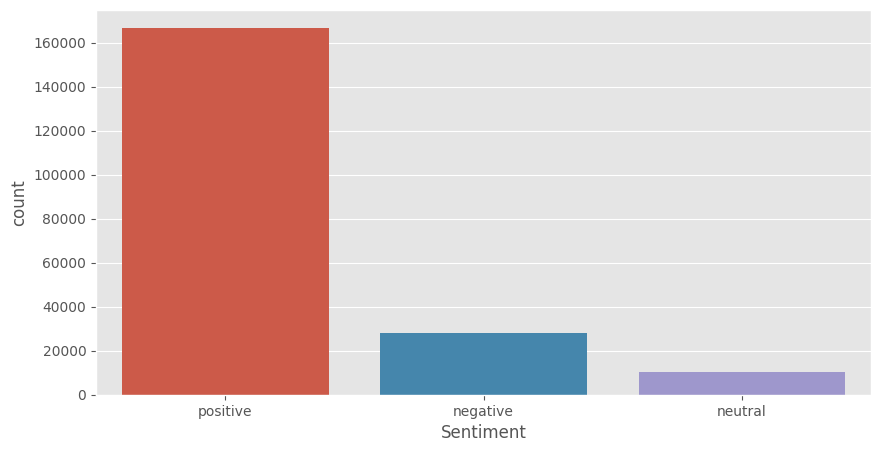

In [ ]:
# plot the (+ve,-ve and neutral)
fig = plt.figure(figsize=(10,5))
sns.countplot(x='Sentiment', data = text_df)
plt.show()

In [ ]:
import nltk             # Download the stop words
nltk.download('stopwords')
nltk.download('punkt')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Tusarjyoti\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Tusarjyoti\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [ ]:
def data_processing(text):
    text = re.sub(r'[^\w\s]','',text) # Removes any characters that are not alphanumeric or whitespace from the text.
    text_tokens = word_tokenize(text) # Tokeinze the Data
    filtered_text = [w for w in text_tokens if not w in stop_words]
    return " ".join(filtered_text)

In [ ]:
# text_df.Summary = text_df['Summary'].apply(data_processing) # Apply the Data processing to the all Tweets

In [ ]:
import nltk   # download stopword for english language using NLTK corpus
nltk.download('punkt')
nltk.download('stopwords')
stopwords = nltk.corpus.stopwords.words('english')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Tusarjyoti\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Tusarjyoti\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [ ]:
text_df['Summary']=text_df['Summary'].astype(str)   # chenage the Summary Column datatype object to STR

In [ ]:
text_df.dtypes      #check the all column data types

Summary      object
Sentiment    object
sentiment     int64
dtype: object

In [ ]:
def data_processing(text):
    text = text.lower()
    text = re.sub(r'[^\w\s]','',text) # Removes any characters that are not alphanumeric or whitespace from the text.
    text_tokens = word_tokenize(text)
    filtered_text = [w for w in text_tokens if not w in stop_words]
    return " ".join(filtered_text)

In [ ]:
text_df.Summary = text_df['Summary'].apply(data_processing) # Apply the Data processing to the all Tweets

In [ ]:
text_df = text_df.drop_duplicates('Summary') # Drop the Duplicates values

In [ ]:
stemmer = PorterStemmer()   # Using Porterstemmer to Handel the stem Words
def stemming(data):
    text = [stemmer.stem(word) for word in data]
    return data

In [ ]:
text_df['Summary'] = text_df['Summary'].apply(lambda x: stemming(x)) # Apply the Stemming to the all Tweets

C:\Users\Tusarjyoti\AppData\Local\Temp\ipykernel_13748\4160874676.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  text_df['Summary'] = text_df['Summary'].apply(lambda x: stemming(x)) # Apply the Stemming to the all Tweets


In [ ]:
text_df.head(10) # Final Tweets result after all the Pre-Processing in the Tweets Data

,Summary,Sentiment,sentiment
0,great cooler excellent air flow price amazing ...,positive,1
1,best budget 2 fit cooler nice cooling,positive,1
2,quality good power air decent,positive,1
3,bad product fan,negative,-1
4,ok ok product,neutral,0
5,cooler really fantastic provides good air flow...,positive,1
6,good product,positive,1
7,nice,positive,1
8,bad cooler,negative,-1
9,good,positive,1


In [ ]:
text_df.drop(['Sentiment'],axis=1,inplace=True)   # Now we drop the Text Sentiment Column

C:\Users\Tusarjyoti\AppData\Local\Temp\ipykernel_13748\832759691.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  text_df.drop(['Sentiment'],axis=1,inplace=True)   # Now we drop the Text Sentiment Column


In [ ]:
text_df  # fetch the data

,Summary,sentiment
0,great cooler excellent air flow price amazing ...,1
1,best budget 2 fit cooler nice cooling,1
2,quality good power air decent,1
3,bad product fan,-1
4,ok ok product,0
...,...,...
205038,nice gifted,1
205040,fabulous looking osm,1
205043,material good backing super,1
205046,beautiful set nice,1


In [ ]:
vect = CountVectorizer(ngram_range=(1,2)).fit(text_df['Summary'])   # Count vectorizer the dataset

In [ ]:
feature_names = vect.get_feature_names_out()                # get the features name
print("Number of features: {}\n".format(len(feature_names)))
print("First 20 features:\n {}".format(feature_names[:20]))

Number of features: 384099

First 20 features:
 ['000' '000 reading' '00000' '0005' '0005 min' '001' '001 childish' '01'
 '01 defective' '01 minutes' '01 month' '01 monthi' '01 product'
 '01 worst' '010' '010 mtr' '0100' '0106' '0106 21installation' '010mtr']


In [ ]:
X = text_df['Summary']          # Seperate the X and Y for train test split
Y = text_df['sentiment']
X = vect.transform(X)

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

In [ ]:
print("Size of x_train:", (x_train.shape))          # check the Train Test Dataset Number
print("Size of y_train:", (y_train.shape))
print("Size of x_test:", (x_test.shape))
print("Size of y_test:", (y_test.shape))

Size of x_train: (68380, 384099)
Size of y_train: (68380,)
Size of x_test: (17096, 384099)
Size of y_test: (17096,)


In [ ]:
import warnings
warnings.filterwarnings('ignore')

In [ ]:
logreg = LogisticRegression()           # Apply the logistics regression model
logreg.fit(x_train, y_train)
logreg_pred = logreg.predict(x_test)
logreg_acc = accuracy_score(logreg_pred, y_test)
print("Test accuracy: {:.2f}%".format(logreg_acc*100))

Test accuracy: 87.00%


In [ ]:
print(confusion_matrix(y_test, logreg_pred))            # get the confusion matrix
print("\n")
print(classification_report(y_test, logreg_pred))

[[ 2583   108   805]
 [  247   176   571]
 [  400    92 12114]]


              precision    recall  f1-score   support

          -1       0.80      0.74      0.77      3496
           0       0.47      0.18      0.26       994
           1       0.90      0.96      0.93     12606

    accuracy                           0.87     17096
   macro avg       0.72      0.63      0.65     17096
weighted avg       0.85      0.87      0.86     17096



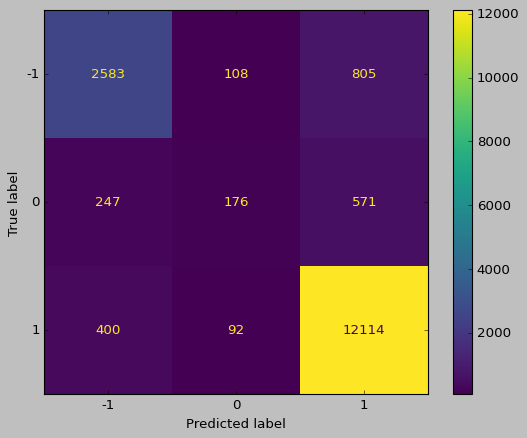

In [ ]:
style.use('classic')                    # plot the heat map
cm = confusion_matrix(y_test, logreg_pred, labels=logreg.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix = cm, display_labels=logreg.classes_)
disp.plot()
plt.show()

## Apply sample Review to check the Model

In [ ]:
sample_review = [input()]    # We need to convert the text to list

sample_review_vect= vect.transform(sample_review)

In [ ]:
logreg_pred = logreg.predict(sample_review_vect)

print("""
 1  for Posotive Review
-1  for Negative Review
 0  for Neutral Review
""")

print(f'The prediction is {logreg_pred[0]}')


 1  for Posotive Review
-1  for Negative Review
 0  for Neutral Review

The prediction is -1
